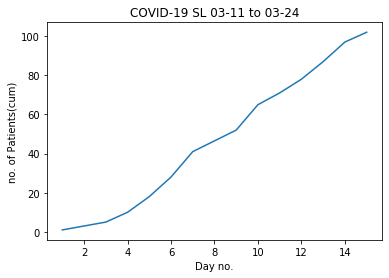

In [15]:
import pandas as pd
import numpy as np

dataset=pd.read_csv('COVID-19 SL 03-11 to 03-24.csv').values

data=dataset[:,0].reshape(-1,1)
target=dataset[:,1].reshape(-1,1)

from matplotlib import pyplot as plt

plt.plot(data,target)
plt.xlabel('Day no.')
plt.ylabel('no. of Patients(cum)')
plt.title('COVID-19 SL 03-11 to 03-24')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=4,include_bias=False)
data_new=poly.fit_transform(data)

In [32]:
from sklearn.linear_model import LinearRegression

algorithm=LinearRegression()
algorithm.fit(data_new,target)

print('Coefficients:',algorithm.coef_)
print('Intercept:',algorithm.intercept_)

Coefficients: [[-6.88737974e+00  2.84199008e+00 -2.12340585e-01  5.49394728e-03]]
Intercept: [5.64705157]


<a href="https://www.codecogs.com/eqnedit.php?latex=y=-6.89x^{4}&plus;2.84x^{3}-0.212x^{2}&plus;0.005x&plus;5.64705157" target="_blank"><img src="https://latex.codecogs.com/gif.latex?y=-6.89x^{4}&plus;2.84x^{3}-0.212x^{2}&plus;0.005x&plus;5.64705157" title="y=-6.89x^{4}+2.84x^{3}-0.212x^{2}+0.005x+5.64705157" /></a>

In [18]:
from sklearn.metrics import r2_score

predicted_target=algorithm.predict(data_new)

print('r2 score:',r2_score(target,predicted_target))

r2 score: 0.9976057859589488


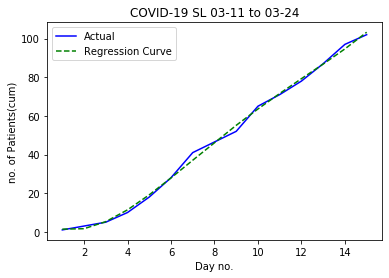

In [31]:
plt.plot(data,target,'b',label='Actual')
plt.plot(data,predicted_target,'g--',label='Regression Curve')
plt.legend()
plt.xlabel('Day no.')
plt.ylabel('no. of Patients(cum)')
plt.title('COVID-19 SL 03-11 to 03-24')
plt.show()

In [27]:
test_data=np.arange(15,26).reshape(-1,1)
test_data_new=poly.fit_transform(test_data)

In [28]:
predicted_target_next_10_days=algorithm.predict(test_data_new)

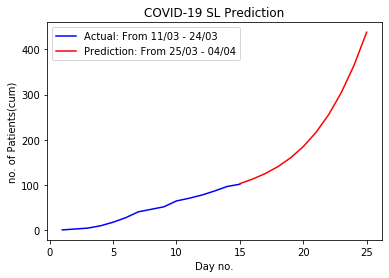

In [39]:
plt.plot(data,target,'b',label='Actual: From 11/03 - 24/03')
plt.plot(test_data,predicted_target_next_10_days,'r',label='Prediction: From 25/03 - 04/04')
plt.legend()
plt.xlabel('Day no.')
plt.ylabel('no. of Patients(cum)')
plt.title('COVID-19 SL Prediction')
plt.show()

In [30]:
predicted_target_next_10_days

array([[103.2657303 ],
       [113.30272922],
       [125.5274061 ],
       [140.84132055],
       [160.27788691],
       [185.00237427],
       [216.31190646],
       [255.63546201],
       [304.53387422],
       [364.69983112],
       [437.95787546]])

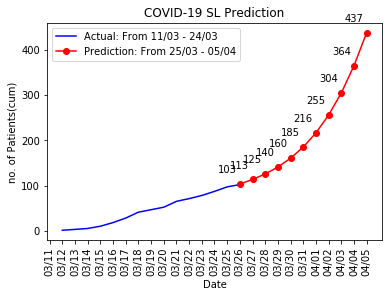

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)

Dates=pd.date_range(start="2020-03-11",end="2020-04-05").strftime('%m/%d')

plt.plot(data,target,'b',label='Actual: From 11/03 - 24/03')
plt.plot(test_data,predicted_target_next_10_days,'r-o',label='Prediction: From 25/03 - 05/04')
plt.legend()
plt.xlabel('Date')
plt.ylabel('no. of Patients(cum)')
plt.xticks(range(0,len(Dates),1), Dates)
plt.xticks(rotation=90)
plt.title('COVID-19 SL Prediction')

for i, v in enumerate(predicted_target_next_10_days.reshape((predicted_target_next_10_days.shape[0]*predicted_target_next_10_days.shape[1]))):
    ax.text(i+14, v+25, "%d" %v, ha="center")

plt.savefig('Prediction.png')
plt.show()